# Simex NOVSL
This notebook runs `sumo_simulator_novsl` function which is modified to not use any VSL.

For running SUMO adjust the path in the `global_settings.py` file. The global_settings.py file also contains the parameters to be set for the simulation such as interval list. The following loop runs the selected sumo simulation for selected modifiers in the loop until it approximate every region or reaches the minimum step.
The sumo simulation function is defined in the `simulator.py` file.

## Important settings
1. Adjust the sumo path.
2. Setting the min/max domain interval and increment unit for the modifiers.
3. Setting the threshold for the validator and validator graph values.
4. Settings for the final plot with overall curves:
```python
"""Define variables for the settings of the Simex

    Attributes:
    instance_name (str): The settings instance name. No default value.
    do_plot: (bool): Enables plot in the modifier of the final modifier points. Default value is 'False'.
    extensive_search (bool): Enables complete exploration by setting modifier_data_point to 1 and enabling extensive iteration. Default value is 'False'.
    extensive_iteration (bool): Gets enabled when extensive search is True (TODO: Refactor) . Default value is 'False'.
    SimEx_mode (str): The mode of simex only exploration implemented. Default value 'exploration'.
    max_workers (int): The maximum number of parallel workers. Default value is '14'.
    domain_min_interval (int): The minimum of the input domain. Default value is '2500'
    domain_max_interval (int): The maximum of the input domain. Default value is '4000'
    modifier_incremental_unit (int): Minimal incremental unit is the smallest allowed step_size. Default value is set to '25'. Note: If extensive search True then minimal increment is set to '1'.
    modifier_data_point (int): Data point step size on the X axis in the first round. Default value is set to '100'. In next iterations modifier_data_point = modifier_data_point - modifier_incremental_unit until modifier_data_point < minimal_increment_unit.
    add_first_last_point (bool): Adding first and last point of the interval generated by the modifier. Default value is set to 'True'. Note: Smoothens the final function.
    vfs_threshold_y_fitting (int): Threshold on the y axis defining the objective function. Default value is set to '15'.
    vfs_threshold_x_interval (float): For unfit point expand by threshold_x_interval to each side to close unfit interval. Default value is set to '0.80'
    vfs_degree (int): Minimum degree for exploration. We start with polyfit in x^degree. Default value is set to '2'.
    vfs_max_deg (int): Max degree for exploration to which degree we try to fit function x^max_degree. Default value is set to '9'.
    vfs_early_stop (bool): If early_stop = True and improvement is not acceptable by increasing dimension, we stop. Default value set to 'True'.
    vfs_improvement_threshold (float): Sufficient improvement threshold (previous_mse - current_mse) >= improvement_threshold. Default value is set to '0.1'.
    vfs_penality_weight (int): Penalty for MSE to avoid overfitting with high dimension polynomial. Default value is set to '1'.
    vfs_x_labels (str): X axis label name validator graph. Default value is set to 'Traffic volume [veh/h]'.
    vfs_y_labels (str): Y axis label name validator graph. Default value is set to 'TTS [veh$\cdot$h]'.
    vfs_title (str): Title for validator graph. Default value is set to 'Fitted Curve with unfit Intervals for {self.instance_name}'.
    vfs_figsize_x (int): X size of the figure. Default value is set to '12'.
    vfs_figsize_y (int): Y size of the figure. Default value is set to '6'.
    vfs_font_size (int): Font size validator graph. Default value is set to '12'.
    ops_x_labels (str): X labels on the final graph. Default value is set to 'Traffic volume [veh/h]'.
    ops_y_labels (str): Y labels on the final graph. Default value is set to 'TTS [veh$\cdot$h]'.
    ops_title (str): Title on the final graph. Default value is set to 'Optimal Curve for {self.instance_name}'.
    ops_figsize_x (int): Figure size on the final graph. Default value is set to '10'.
    ops_figsize_y (int): Figure size on the final graph. Default value is set to '5'.
    ops_linewidth (int): Linewidth on the final graph. Default value is set to '3'.
    ops_number_x_points (int): Number of x axis points for the final graph. Default value is set to '400'.
    ops_predicted_points (bool): Display predicted points on the final graph. Default value is set to 'True'.
    ops_sigmoid_tailing (bool): Enable sigmoid tailing smoothener. Default value is set to 'True'.
    ops_sigmoid_width (int): Sigmoid width for the sigmoid smoothening. Default value is set to '15'.
    ops_threshold_plot (bool): Plot y_threshold on the final graph. Default value is set to 'True'.
    results_dir (str): Name of the results directory. Default value is set to 'results_dir_{instance_name}-{timestamp}'.
    log_filename (str): Filename for the log file. Default name is set to 'LOG-{self.instance_name}'.
    csv_filename (str): Final csv filename with the results. Default name is set to 'simex_output-{instance_name}'.
    """
```


Running simex.
Instance name NOVSL_script
Results dir /home/amy/tmp/repos/SimEx/notebooks/results_dir_NOVSL_script-20240911-191200
Modifier...
[MODC]: (interval_min_tick, interval_max_tick):  (2500, 4000)
[MODC]: mod_ticks:  [2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900]
Temp x: [2600, 2700, 2800, 2900, 3000, 3100, 3200, 3300, 3400, 3500, 3600, 3700, 3800, 3900]
[MODC]: mod_x:  [2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 3666.153846153846, 3781.5384615384614, 3900.0]
[MODC]: mod_x:  {14}
MAIN mod outcome ([[2500.0, 2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 3666.153846153846, 3781.5384615384614, 3900.0, 4000.0]], [[2500, 4000]])
S

Step #5400.00 (22ms ~= 11.36*RT, ~11590.91UPS, TraCI: 1ms, vehicles TOT 5999 ACT 255 BUF 0
Step #4475.00 (25ms ~= 10.00*RT, ~15160.00UPS, TraCI: 0ms, vehicles TOT 5791 ACT 379 BUF 0

Step #5400.00 (18ms ~= 13.89*RT, ~13722.22UPS, TraCI: 1ms, vehicles TOT 6269 ACT 247 BUF 0


Step #4475.00 (26ms ~= 9.62*RT, ~19500.00UPS, TraCI: 1ms, vehicles TOT 5940 ACT 507 BUF 0)

Step #4475.00 (29ms ~= 8.62*RT, ~20103.45UPS, TraCI: 0ms, vehicles TOT 6089 ACT 583 BUF 0)

Step #5400.00 (19ms ~= 13.16*RT, ~14000.00UPS, TraCI: 0ms, vehicles TOT 6539 ACT 266 BUF 0


Step #5400.00 (22ms ~= 11.36*RT, ~13090.91UPS, TraCI: 1ms, vehicles TOT 6719 ACT 288 BUF 0
Step #5400.00 (19ms ~= 13.16*RT, ~14052.63UPS, TraCI: 1ms, vehicles TOT 6359 ACT 267 BUF 0 #4500.00 (20ms ~= 12.50*RT, ~14000.00UPS, TraCI: 1ms, vehicles TOT 5450 ACT 280 BUF 0


Step #1100.00 (15ms ~= 16.67*RT, ~24466.67UPS, TraCI: 0ms, vehicles TOT 1402 ACT 367 BUF 0

Step #5400.00 (11ms ~= 22.73*RT, ~27000.00UPS, TraCI: 1ms, vehicles TOT 6809 ACT 297 BUF 0


Step #5400.00 (13ms ~= 19.23*RT, ~23230.77UPS, TraCI: 1ms, vehicles TOT 6989 ACT 302 BUF 0
Step #5400.00 (20ms ~= 12.50*RT, ~18650.00UPS, TraCI: 1ms, vehicles TOT 7169 ACT 373 BUF 0
Step #5400.00 (18ms ~= 13.89*RT, ~24222.22UPS, TraCI: 1ms, vehicles TOT 7349 ACT 436 BUF 0
ep #1125.00 (16ms ~= 15.62*RT, ~23500.00UPS, TraCI: 1ms, vehicles TOT 1437 ACT 376 BUF 0ep #2250.00 (7ms ~= 35.71*RT, ~71142.86UPS, TraCI: 1ms, vehicles TOT 3063 ACT 498 BUF 0)ep #2250.00 (11ms ~= 22.73*RT, ~48090.91UPS, TraCI: 0ms, vehicles TOT 3138 ACT 529 BUF 0

Step #5400.00 (7ms ~= 35.71*RT, ~65857.14UPS, TraCI: 0ms, vehicles TOT 7529 ACT 461 BUF 0)


Step #5400.00 (10ms ~= 25.00*RT, ~49400.00UPS, TraCI: 1ms, vehicles TOT 7709 ACT 494 BUF 0
Simulation output: [339.5416666666667, 346.1388888888888, 362.6805555555555, 372.5, 391.3055555555557, 396.61111111111103, 418.1666666666667, 425.0833333333333, 444.5, 481.09722222222234, 514.3055555555554, 595.3333333333331, 655.1527777777777, 720.3333333333335, 769.7777777777777, 794.9305555555558]
MODX [2500.0, 2600.0, 2681.5384615384614, 2766.153846153846, 2853.846153846154, 2944.6153846153848, 3038.4615384615386, 3135.3846153846152, 3235.3846153846152, 3338.4615384615386, 3444.6153846153848, 3553.846153846154, 3666.153846153846, 3781.5384615384614, 3900.0, 4000.0] and sim_y_list [339.5416666666667, 346.1388888888888, 362.6805555555555, 372.5, 391.3055555555557, 396.61111111111103, 418.1666666666667, 425.0833333333333, 444.5, 481.09722222222234, 514.3055555555554, 595.3333333333331, 655.1527777777777, 720.3333333333335, 769.7777777777777, 794.9305555555558]
MAIN modx [2500.0, 2600.0, 2681.538

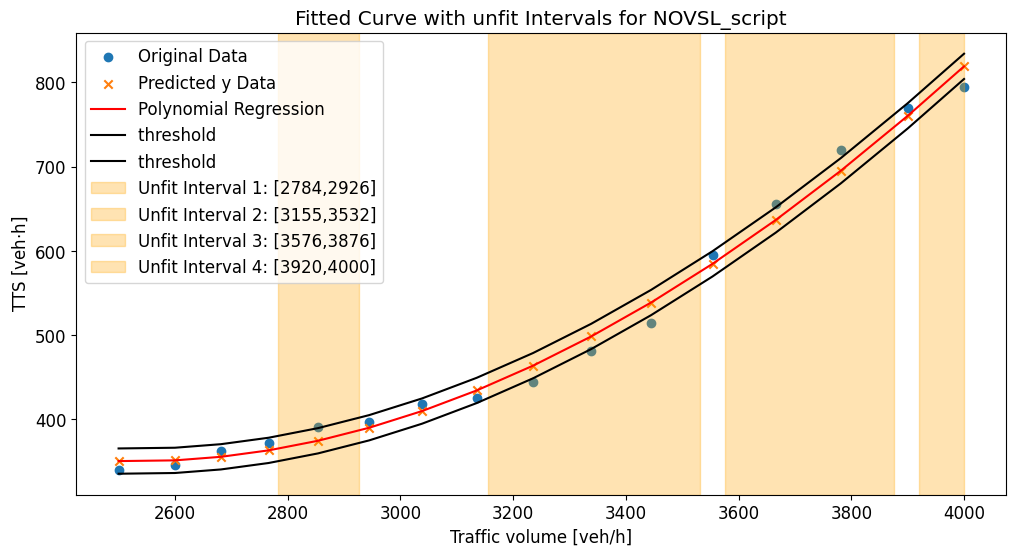

MAIN interval list from VAL: [[2783.6923076923076, 2926.4615384615386], [3155.3846153846152, 3532.0], [3576.3076923076924, 3876.3076923076924], [3920.0, 4000.0]]
Modifier...
[MODC]: (interval_min_tick, interval_max_tick):  (2783.6923076923076, 2926.4615384615386)
[MODC]: mod_ticks:  [2800, 2875]
Temp x: [2800, 2875]
[MODC]: mod_x:  [2800.0, 2875.0]
[MODC]: mod_x:  {2}
[MODC]: (interval_min_tick, interval_max_tick):  (3155.3846153846152, 3532.0)
[MODC]: mod_ticks:  [3175, 3250, 3325, 3400, 3475]
Temp x: [3175, 3250, 3325, 3400, 3475]
[MODC]: mod_x:  [3175.0, 3247.4624060150377, 3321.6165413533836, 3397.4624060150377, 3475.0]
[MODC]: mod_x:  {5}
[MODC]: (interval_min_tick, interval_max_tick):  (3576.3076923076924, 3876.3076923076924)
[MODC]: mod_ticks:  [3625, 3700, 3775, 3850]
Temp x: [3625, 3700, 3775, 3850]
[MODC]: mod_x:  [3625.0, 3698.494983277592, 3773.494983277592, 3850.0]
[MODC]: mod_x:  {4}
[MODC]: (interval_min_tick, interval_max_tick):  (3920.0, 4000.0)
[MODC]: mod_ticks:  [39

x list [4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0, 4000.0]
Running sumo simulator
 Retrying in 1 seconds
Step #5400.00 (26ms ~= 9.62*RT, ~10461.54UPS, TraCI: 1ms, vehicles TOT 6449 ACT 272 BUF 0)


Step #5400.00 (39ms ~= 6.41*RT, ~6820.51UPS, TraCI: 1ms, vehicles TOT 6539 ACT 266 BUF 0) 


Step #5400.00 (19ms ~= 13.16*RT, ~14421.05UPS, TraCI: 1ms, vehicles TOT 6629 ACT 274 BUF 0


tep #4700.00 (31ms ~= 8.06*RT, ~18677.42UPS, TraCI: 1ms, vehicles TOT 6440 ACT 579 BUF 0)

Step #5400.00 (22ms ~= 11.36*RT, ~14181.82UPS, TraCI: 0ms, vehicles TOT 6899 ACT 312 BUF 0 #4500.00 (24ms ~= 10.42*RT, ~17750.00UPS, TraCI: 1ms, vehicles TOT 5900 ACT 426 BUF 0
Step #5400.00 (21ms ~= 11.90*RT, ~14238.10UPS, TraCI: 1ms, vehicles TOT 6809 ACT 299 BUF 0Step #0.00 (0ms ?*RT. ?UPS, TraCI: 1ms, vehicles TOT 0 ACT 0 BUF 0)                        #4500.00 (51ms ~= 4.90*RT, ~8235.29UPS, TraCI: 1ms, vehicles TOT 5825 ACT 420 BUF 0) 
Step #5400.00 (23ms ~= 10.87*RT, ~13652.17UPS, TraCI: 1ms, vehicles TOT 6989 ACT 314 BUF 0
Step #5400.00 (23ms ~= 10.87*RT, ~14652.17UPS, TraCI: 0ms, vehicles TOT 7079 ACT 337 BUF 0 #4500.00 (48ms ~= 5.21*RT, ~11291.67UPS, TraCI: 3ms, vehicles TOT 6050 ACT 542 BUF 0)
Step #5400.00 (24ms ~= 10.42*RT, ~13375.00UPS, TraCI: 1ms, vehicles TOT 7079 ACT 321 BUF 0
Step #5400.00 (15ms ~= 16.67*RT, ~28666.67UPS, TraCI: 1ms, vehicles TOT 7259 ACT 430 BUF 0Step #4825.00 (28ms ~= 8.93*RT, ~20071.43UPS, TraCI: 4ms, vehicles TOT 6585 ACT 562 BUF 0)
ep #1125.00 (23m

Step #3350.00 (16ms ~= 15.62*RT, ~42000.00UPS, TraCI: 1ms, vehicles TOT 4751 ACT 672 BUF 0

Step #4575.00 (16ms ~= 15.62*RT, ~40187.50UPS, TraCI: 1ms, vehicles TOT 6490 ACT 643 BUF 0

Step #4625.00 (16ms ~= 15.62*RT, ~39187.50UPS, TraCI: 1ms, vehicles TOT 6551 ACT 627 BUF 0

Step #5400.00 (15ms ~= 16.67*RT, ~29466.67UPS, TraCI: 1ms, vehicles TOT 7349 ACT 442 BUF 0


Step #5400.00 (14ms ~= 17.86*RT, ~31785.71UPS, TraCI: 2ms, vehicles TOT 7529 ACT 445 BUF 0


Step #5400.00 (9ms ~= 27.78*RT, ~51888.89UPS, TraCI: 0ms, vehicles TOT 7439 ACT 467 BUF 0)
Step #5400.00 (10ms ~= 25.00*RT, ~45800.00UPS, TraCI: 0ms, vehicles TOT 7529 ACT 458 BUF 0


Step #5400.00 (6ms ~= 41.67*RT, ~77000.00UPS, TraCI: 0ms, vehicles TOT 7529 ACT 462 BUF 0)


Step #5400.00 (24ms ~= 10.42*RT, ~20583.33UPS, TraCI: 1ms, vehicles TOT 7709 ACT 494 BUF 0
Simulation output: [370.48611111111126, 377.5555555555555, 387.11111111111103, 397.29166666666674, 437.8333333333333, 440.6249999999999, 468.7777777777777, 474.63888888888897, 531.9999999999999, 538.1111111111113, 577.3055555555553, 631.1666666666663, 618.4166666666671, 696.7638888888889, 727.1805555555551, 763.9722222222222, 758.5555555555555, 762.4861111111111, 752.2222222222225, 794.9305555555558]
MODX [2783.6923076923076, 2800.0, 2875.0, 2926.4615384615386, 3155.3846153846152, 3175.0, 3247.4624060150377, 3321.6165413533836, 3397.4624060150377, 3475.0, 3532.0, 3576.3076923076924, 3625.0, 3698.494983277592, 3773.494983277592, 3850.0, 3876.3076923076924, 3920.0, 3925, 4000.0] and sim_y_list [370.48611111111126, 377.5555555555555, 387.11111111111103, 397.29166666666674, 437.8333333333333, 440.6249999999999, 468.7777777777777, 474.63888888888897, 531.9999999999999, 538.1111111111113, 577.305555555

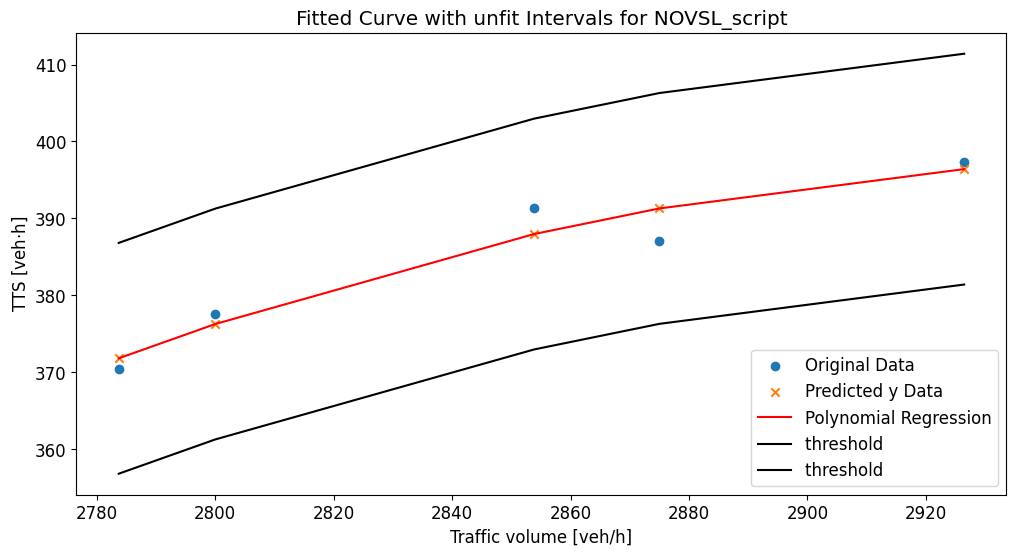

equation,
 y =  -0.0007989695197965614x^2 + 4.734468695791194x^1  -6616.320604089728 
unfit_points
 [(2783.6923076923076, 370.48611111111126), (2800.0, 377.5555555555555), (2853.846153846154, 391.3055555555557), (2875.0, 387.11111111111103), (2926.4615384615386, 397.29166666666674)] 
local_unfit_interval
, [[2783.6923076923076, 2926.4615384615386]]
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[3155.3846153846152, 3350.2617119722386]]


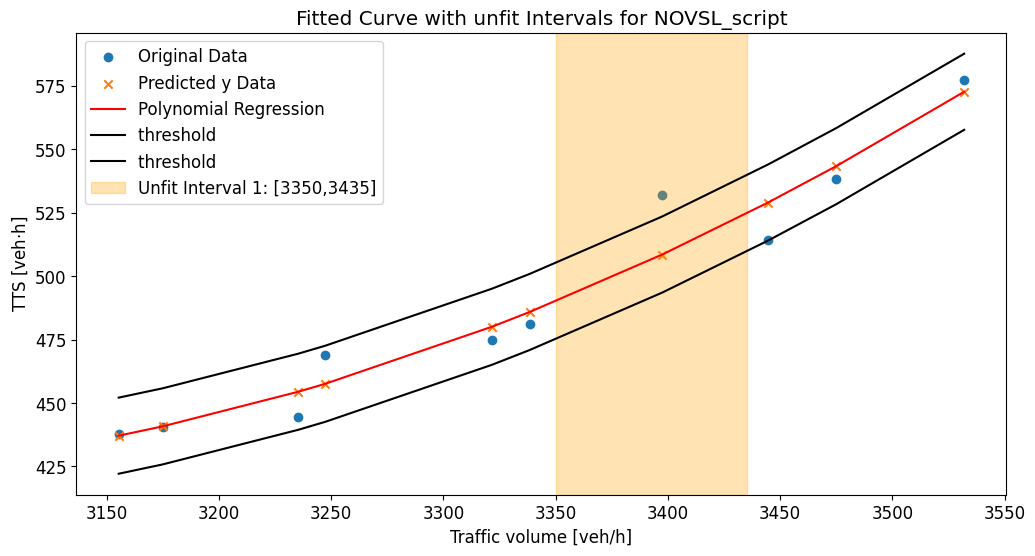

equation,
 y =  0.00048349256221972073x^2  -2.873366403722466x^1 + 4689.803304575271 
unfit_points
 [(3155.3846153846152, 437.8333333333333), (3175.0, 440.6249999999999), (3235.3846153846152, 444.5), (3247.4624060150377, 468.7777777777777), (3321.6165413533836, 474.63888888888897), (3338.4615384615386, 481.09722222222234), (3397.4624060150377, 531.9999999999999), (3444.6153846153848, 514.3055555555554), (3475.0, 538.1111111111113), (3532.0, 577.3055555555553)] 
local_unfit_interval
, [[3155.3846153846152, 3350.2617119722386], [3435.1847888953153, 3532.0]]
       *** USING local_exploration_validator_A
       *** USING get_fit_intervals:   [[3576.3076923076924, 3576.3076923076924]]


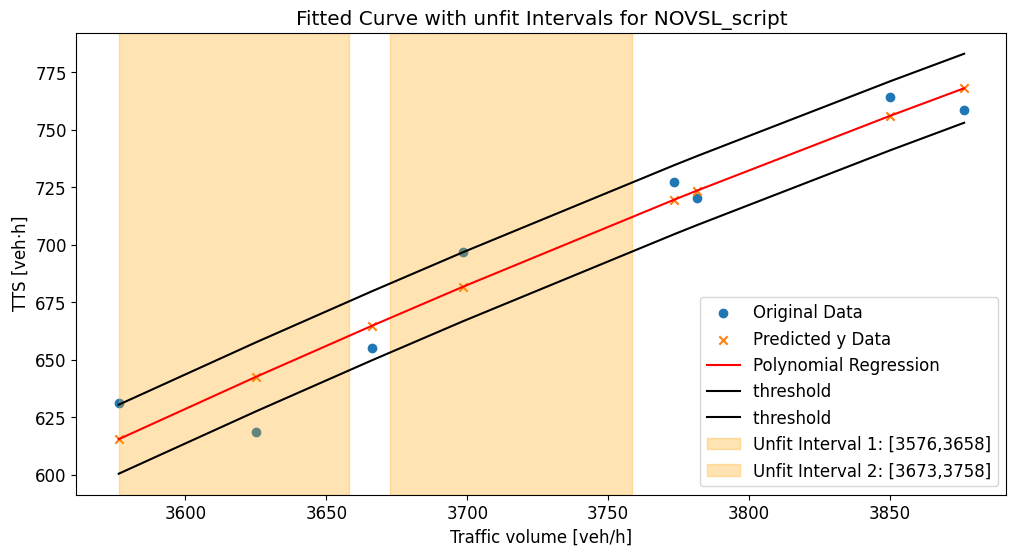

equation,
 y =  -0.00019094883127002992x^2 + 1.9315388366192852x^1  -3850.0965622607077 
unfit_points
 [(3576.3076923076924, 631.1666666666663), (3625.0, 618.4166666666671), (3666.153846153846, 655.1527777777777), (3698.494983277592, 696.7638888888889), (3773.494983277592, 727.1805555555551), (3781.5384615384614, 720.3333333333335), (3850.0, 763.9722222222222), (3876.3076923076924, 758.5555555555555)] 
local_unfit_interval
, [[3576.3076923076924, 3576.3076923076924], [3657.923076923077, 3672.6220735785955], [3758.494983277592, 3876.3076923076924]]
       *** USING local_exploration_validator_A


/home/amy/tmp/repos/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)
/home/amy/tmp/repos/SimEx/notebooks/validator.py:46: RankWarning: Polyfit may be poorly conditioned
  current_coeff = np.polyfit(x_values, y_values, deg=degree)


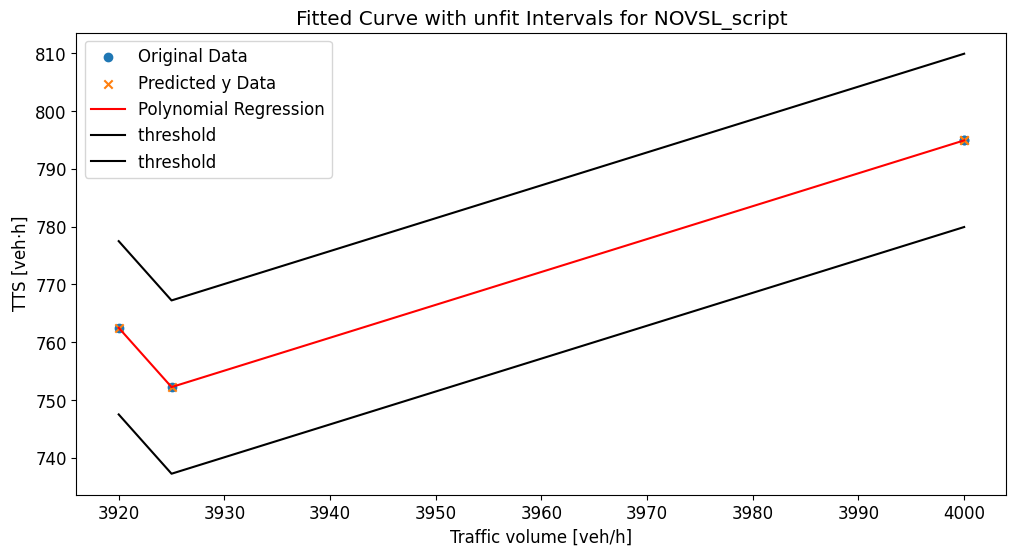

equation,
 y =  1.6002432613395616e-17x^6 + 4.4011479737644214e-16x^5  -1.4964091008432916e-10x^4  -7.978924754749758e-07x^3  -0.0023879593101711334x^2  -0.043159901848170916x^1 + 62551.46900069114 
unfit_points
 [(3920.0, 762.4861111111111), (3925.0, 752.2222222222225), (4000.0, 794.9305555555558), (4000.0, 794.9305555555558)] 
local_unfit_interval
, [[3920.0, 4000.0]]
DIFFERENCES 
each_interval  [3920.0, 4000.0] 
new_unfit_interval   []
MAIN interval list from VAL: [[3350.2617119722386, 3435.1847888953153], [3576.3076923076924, 3657.923076923077], [3672.6220735785955, 3758.494983277592]]
Modifier...
[MODC]: (interval_min_tick, interval_max_tick):  (3350.2617119722386, 3435.1847888953153)
[MODC]: mod_ticks:  [3400]
Temp x: [3400]
[MODC]: mod_x:  [3400]
[MODC]: mod_x:  {1}
[MODC]: (interval_min_tick, interval_max_tick):  (3576.3076923076924, 3657.923076923077)
[MODC]: mod_ticks:  [3600, 3650]
Temp x: [3600, 3650]
[MODC]: mod_x:  [3600.0, 3650.0]
[MODC]: mod_x:  {2}
[MODC]: (interval_mi

 #3375.00 (25ms ~= 10.00*RT, ~16800.00UPS, TraCI: 0ms, vehicles TOT 4283 ACT 420 BUF 0Step #3975.00 (30ms ~= 8.33*RT, ~24333.33UPS, TraCI: 1ms, vehicles TOT 5570 ACT 730 BUF 0)

tep #4150.00 (31ms ~= 8.06*RT, ~23129.03UPS, TraCI: 1ms, vehicles TOT 5806 ACT 717 BUF 0)

tep #4225.00 (31ms ~= 8.06*RT, ~22580.65UPS, TraCI: 0ms, vehicles TOT 5904 ACT 700 BUF 0)

 #3375.00 (29ms ~= 8.62*RT, ~18275.86UPS, TraCI: 0ms, vehicles TOT 4508 ACT 530 BUF 0)p #3375.00 (32ms ~= 7.81*RT, ~18562.50UPS, TraCI: 1ms, vehicles TOT 4621 ACT 594 BUF 0)

 #3375.00 (49ms ~= 5.10*RT, ~11244.90UPS, TraCI: 1ms, vehicles TOT 4565 ACT 551 BUF 0)Step #4325.00 (32ms ~= 7.81*RT, ~21312.50UPS, TraCI: 1ms, vehicles TOT 6040 ACT 682 BUF 0)

Step #5400.00 (21ms ~= 11.90*RT, ~14476.19UPS, TraCI: 1ms, vehicles TOT 6809 ACT 304 BUF 0


Step #5400.00 (20ms ~= 12.50*RT, ~14400.00UPS, TraCI: 2ms, vehicles TOT 6719 ACT 288 BUF 0


Step #5400.00 (19ms ~= 13.16*RT, ~15789.47UPS, TraCI: 1ms, vehicles TOT 6809 ACT 300 BUF 0


Step #5400.00 (15ms ~= 16.67*RT, ~20533.33UPS, TraCI: 0ms, vehicles TOT 7079 ACT 308 BUF 0
Step #5400.00 (12ms ~= 20.83*RT, ~26750.00UPS, TraCI: 0ms, vehicles TOT 7079 ACT 321 BUF 0
Step #5400.00 (13ms ~= 19.23*RT, ~30538.46UPS, TraCI: 1ms, vehicles TOT 7169 ACT 397 BUF 0
Step #5400.00 (15ms ~= 16.67*RT, ~28133.33UPS, TraCI: 1ms, vehicles TOT 7169 ACT 422 BUF 0
Step #5400.00 (18ms ~= 13.89*RT, ~22111.11UPS, TraCI: 1ms, vehicles TOT 7169 ACT 398 BUF 0
Step #5400.00 (9ms ~= 27.78*RT, ~51111.11UPS, TraCI: 2ms, vehicles TOT 7349 ACT 460 BUF 0)
Step #5400.00 (8ms ~= 31.25*RT, ~54875.00UPS, TraCI: 1ms, vehicles TOT 7349 ACT 439 BUF 0)
Step #5400.00 (8ms ~= 31.25*RT, ~54250.00UPS, TraCI: 0ms, vehicles TOT 7259 ACT 434 BUF 0)
Simulation output: [504.8888888888888, 532.4027777777778, 509.11111111111137, 631.1666666666663, 613.8194444444445, 647.5416666666665, 668.2916666666669, 660.4861111111114, 701.0416666666665, 717.3055555555559, 732.2500000000002]
MODX [3350.2617119722386, 3400, 3435.18478

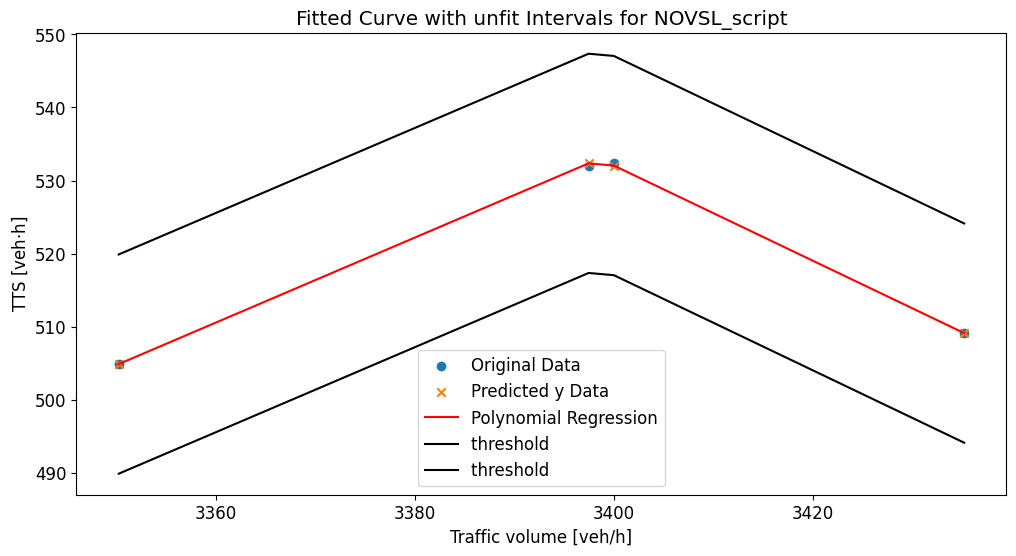

equation,
 y =  -0.01410262249882141x^2 + 95.7425672445505x^1  -161966.3657993536 
unfit_points
 [(3350.2617119722386, 504.8888888888888), (3397.4624060150377, 531.9999999999999), (3400.0, 532.4027777777778), (3435.1847888953153, 509.11111111111137)] 
local_unfit_interval
, [[3350.2617119722386, 3435.1847888953153]]
       *** USING local_exploration_validator_A


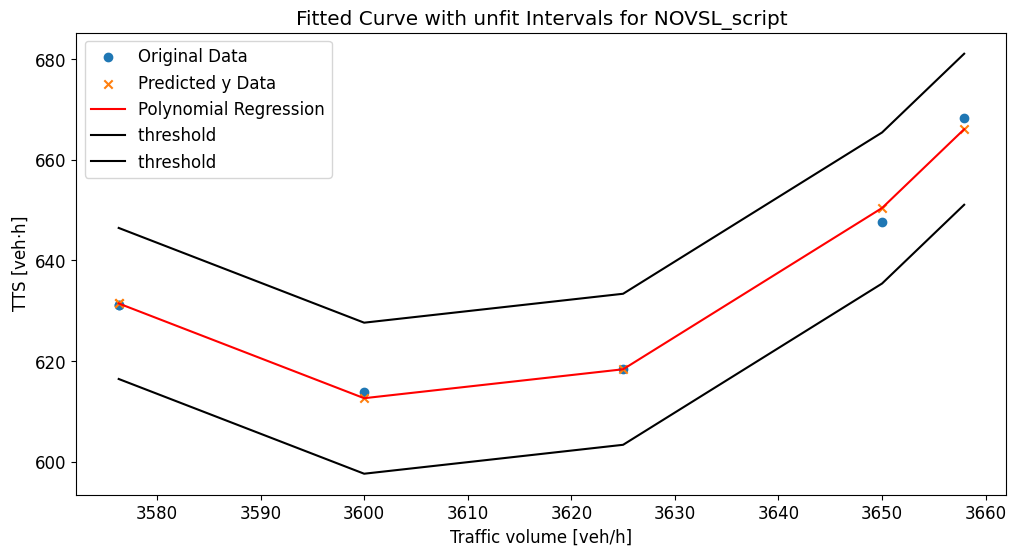

equation,
 y =  0.021032425805981036x^2  -151.7294308273811x^1 + 274258.34840598685 
unfit_points
 [(3576.3076923076924, 631.1666666666663), (3576.3076923076924, 631.1666666666663), (3600.0, 613.8194444444445), (3625.0, 618.4166666666671), (3650.0, 647.5416666666665), (3657.923076923077, 668.2916666666669)] 
local_unfit_interval
, [[3576.3076923076924, 3657.923076923077]]
       *** USING local_exploration_validator_A


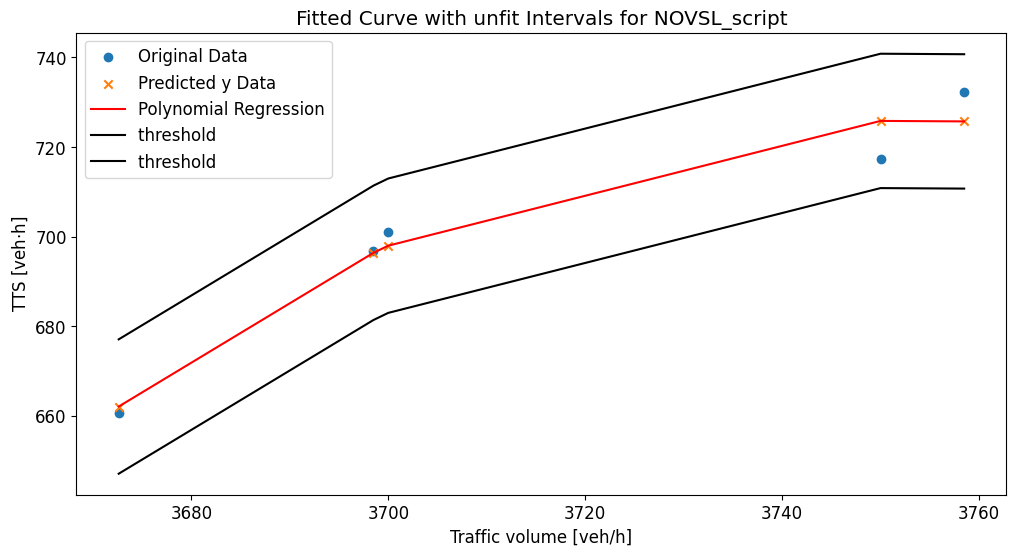

equation,
 y =  -0.009750209525888176x^2 + 73.19626789685776x^1  -136647.87421761805 
unfit_points
 [(3672.6220735785955, 660.4861111111114), (3698.494983277592, 696.7638888888889), (3700.0, 701.0416666666665), (3750.0, 717.3055555555559), (3758.494983277592, 732.2500000000002)] 
local_unfit_interval
, [[3672.6220735785955, 3758.494983277592]]
DIFFERENCES 
each_interval  [3672.6220735785955, 3758.494983277592] 
new_unfit_interval   []
MAIN interval list from VAL: []
FIT POINT: (2500.0, 339.54167)
FIT POINT: (2600.0, 346.13889)
FIT POINT: (2681.53846, 362.68056)
FIT POINT: (2766.15385, 372.5)
FIT POINT: (2800.0, 377.55556)
FIT POINT: (2853.84615, 391.30556)
FIT POINT: (2875.0, 387.11111)
FIT POINT: (2926.46154, 397.29167)
FIT POINT: (2944.61538, 396.61111)
FIT POINT: (3038.46154, 418.16667)
FIT POINT: (3135.38462, 425.08333)
FIT POINT: (3175.0, 440.625)
FIT POINT: (3235.38462, 444.5)
FIT POINT: (3247.46241, 468.77778)
FIT POINT: (3321.61654, 474.63889)
FIT POINT: (3338.46154, 481.09722)

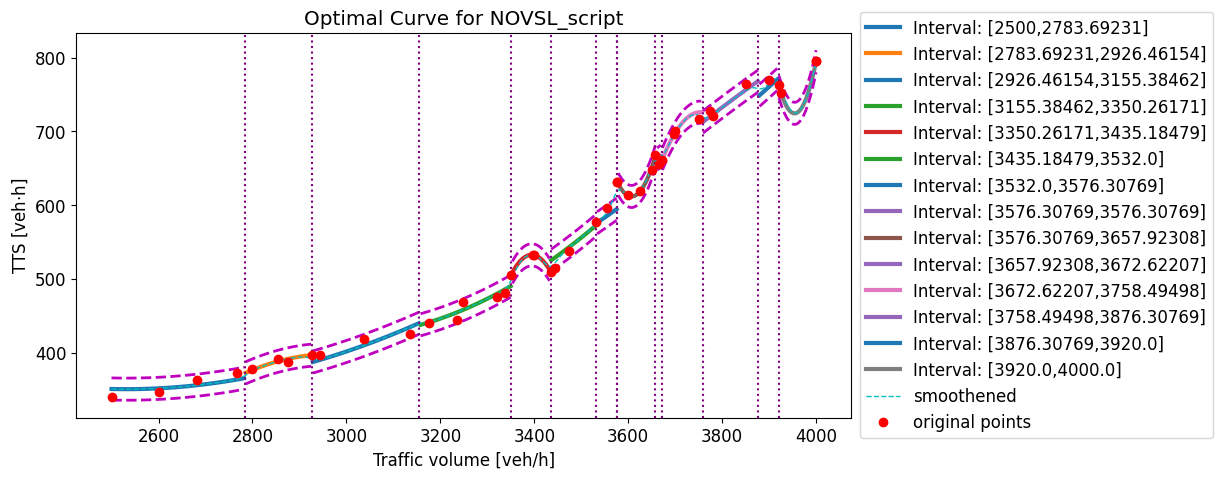

/home/amy/tmp/repos/SimEx/notebooks/results_dir_NOVSL_script-20240911-191200/simex_output-NOVSL_script-20240911-191200.csv
Run finished. CSV file is /home/amy/tmp/repos/SimEx/notebooks/results_dir_NOVSL_script-20240911-191200/simex_output-NOVSL_script-20240911-191200.csv
Run time: 44.81836656332016


In [1]:
from simulator import Simulator
from validator import Validator
from modifier import Modifier
from simex import run_simex
import time
before = time.time()
# Run simex
print("Running simex.")
base_file = run_simex(simulator_function=Simulator.sumo_simulator_novsl, modifier=Modifier.modifierA, validator=Validator.local_exploration_validator_A,instance_name='NOVSL_script')
print(f"Run finished. CSV file is {base_file}")

now = time.time()
print(f"Run time: {(now-before)/60}")